### Import Tensorflow

In [58]:
import tensorflow as tf
import absl

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print('Using Tensorflow version', tf.__version__)

Using Tensorflow version 2.9.1


### Import MNIST

In [59]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [60]:
print('x_train Shape: ',x_train.shape)
print('y_train Shape: ',y_train.shape)
print('x_test  Shape: ',x_test.shape)
print('y_test  Shape: ',y_test.shape)

x_train Shape:  (60000, 28, 28)
y_train Shape:  (60000,)
x_test  Shape:  (10000, 28, 28)
y_test  Shape:  (10000,)


## matplotlib to display the image

In [61]:
from matplotlib import pyplot as plt

%matplotlib inline

##to make it displayed wihtin notebook

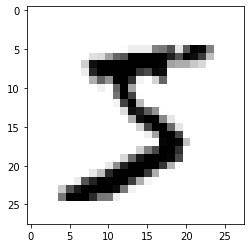

In [62]:
## reading and displaying a trainng example
plt.imshow(x_train[0],cmap='binary')
plt.show()

## hot encoding

In [63]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [64]:
print('y_train_encoded shape: ',y_train_encoded.shape)
print('y_test_encoded shape : ',y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape :  (10000, 10)


## pre-processing the examples

In [65]:
import numpy as np

x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))

#validating
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [66]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


## Normalization

In [67]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

## Display normalized Pixel values

In [68]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

## Creating the model

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    
    Dense(128, activation ='relu', input_shape=(784,)),
    Dense(128, activation ='relu'),
    Dense(10, activation ='softmax')
    
])

## Compiling the model

In [94]:
model.compile(
    
    optimizer ='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               100480    
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [96]:
model.fit(x_train_norm, y_train_encoded, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1131 - accuracy: 0.9671
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0947 - accuracy: 0.9726
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0812 - accuracy: 0.9765


In [106]:
_, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy:' , accuracy*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.1007 - accuracy: 0.9665
Test set accuracy: 96.64999842643738


## Predictions on test set

In [107]:
preds = model.predict(x_test_norm)
print('Shape of preds: ',preds.shape)

313/313 [==============================] - 1s 3ms/step
Shape of preds:  (10000, 10)


## Plotting the results

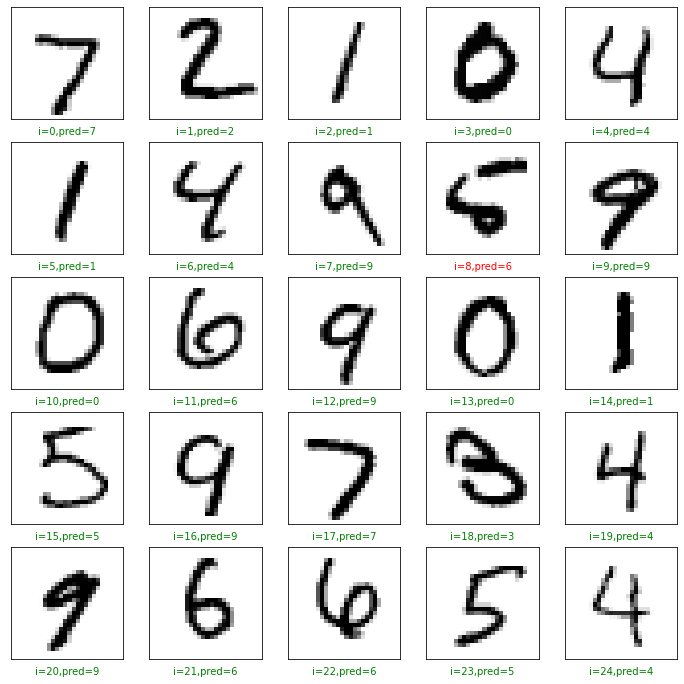

In [109]:
plt.figure(figsize=(12,12))
start_index = 0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt=y_test[start_index+i]
    
    col='g'
    if pred != gt:
        col='r'
    
    plt.xlabel('i={},pred={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(x_test[start_index+i], cmap='binary')
plt.show()

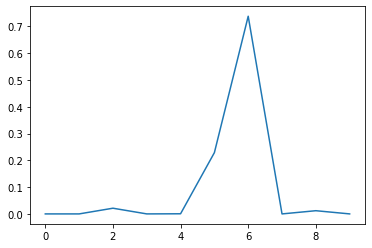

In [110]:
plt.plot(preds[8])
plt.show()